In [3]:
import os

print(os.listdir("."))

import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import morphology
from skimage.morphology import disk, binary_erosion, binary_dilation, binary_opening, binary_closing
from skimage.filters import threshold_otsu, gaussian
from scipy import ndimage as ndi
from scipy.ndimage import binary_fill_holes
import napari_segment_blobs_and_things_with_membranes as nsbatwm
import napari
!pip install plotly
import plotly.io
import plotly.express as px
import imageio as io

['.ipynb_checkpoints', 'image_segmentation1.ipynb', 'Quality_control_data', 'Stardist_CancerCells_model', 'Training_data']
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
   ----- ---------------------------------- 2.4/16.1 MB 14.9 MB/s eta 0:00:01
   ------------ --------------------------- 5.0/16.1 MB 14.3 MB/s eta 0:00:01
   -------------------- ------------------- 8.1/16.1 MB 14.0 MB/s eta 0:00:01
   ---------------------------- ----------- 11.5/16.1 MB 14.1 MB/s eta 0:00:01
   ------------------------------------ --- 14.7/16.1 MB 14.4 MB/s eta 0:00:01
   ---------------------------------------- 16.1/16.1 MB 13.9 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   -------------------------------------

In [2]:
print(os.listdir("Training_data/230313_Stardist_CC_round_source_JP"))

['01.tif', '03.tif', '04.tif', '05.tif', '06.tif', '07.tif', '09.tif', '10.tif', '11.tif', '12.tif', '13.tif', '15.tif', '16.tif', '17.tif', '18.tif', '19.tif', '21.tif', '22.tif', '23.tif', '24.tif']


In [3]:
from skimage.io import imread
from matplotlib.pyplot import imshow
import stackview

image = imread("Training_data/230313_Stardist_CC_round_source_JP/01.tif")
image

array([[1577, 1465, 1332, ..., 1407, 1425, 1406],
       [1610, 1538, 1467, ..., 1400, 1401, 1419],
       [1463, 1516, 1544, ..., 1399, 1418, 1419],
       ...,
       [1372, 1367, 1380, ..., 1414, 1402, 1384],
       [1352, 1360, 1384, ..., 1373, 1401, 1391],
       [1380, 1380, 1381, ..., 1427, 1425, 1432]], dtype=uint16)

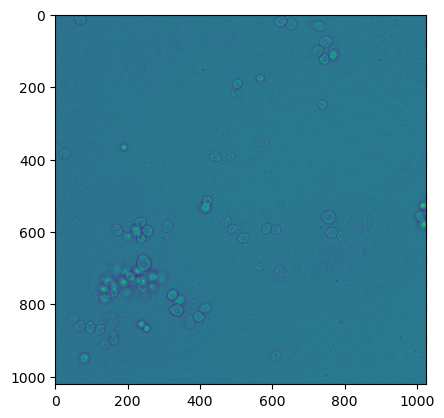

In [4]:
imshow(image)

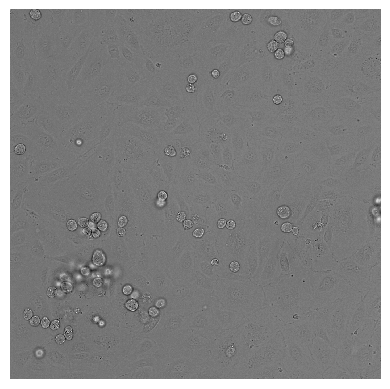

In [5]:
stackview.imshow(image)

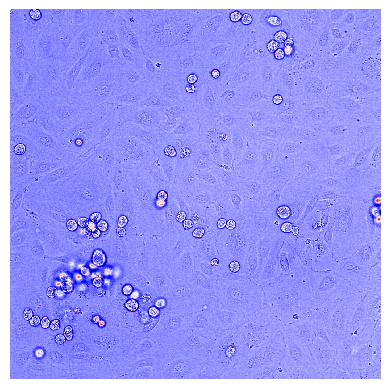

In [6]:
stackview.imshow(image, colormap="seismic")

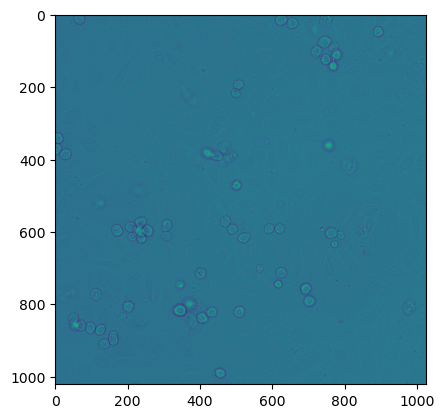

In [8]:
image2 = imread("Training_data/230313_Stardist_CC_round_source_JP/03.tif")
imshow(image2)

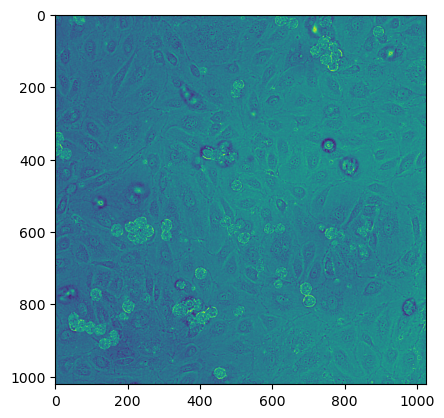

In [9]:
denoised_mean = filters.rank.mean(image2.astype(np.uint8), morphology.disk(1))
imshow(denoised_mean)

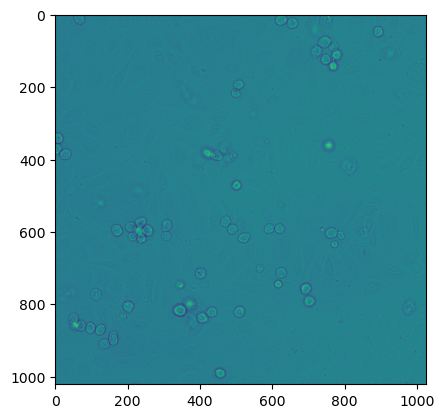

In [10]:
denoised_median = filters.median(image2, morphology.disk(1))
imshow(denoised_median)

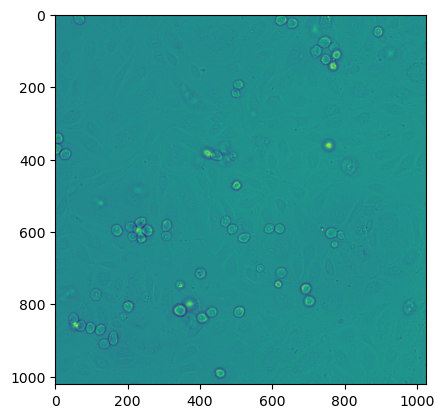

In [11]:
denoised_gaussian = filters.gaussian(image2, sigma=1)
imshow(denoised_gaussian)

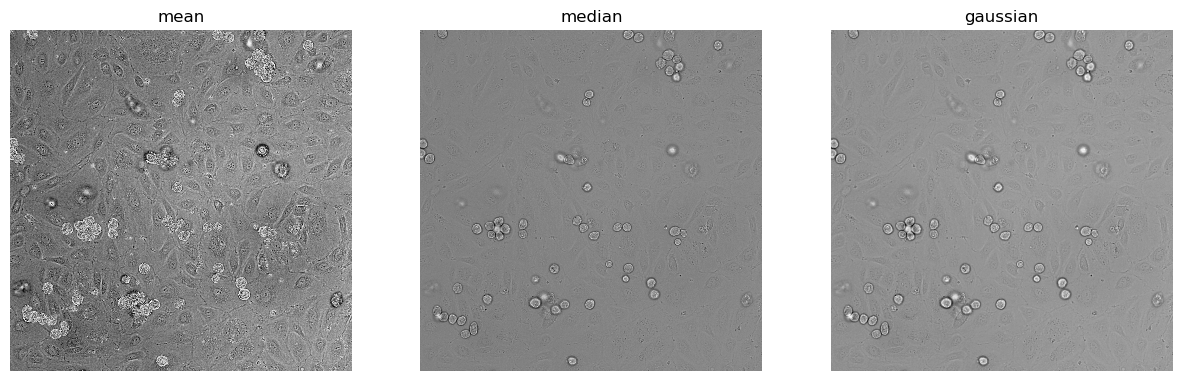

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15,15)) 
stackview.imshow(denoised_mean, plot=axes[0], title="mean")
stackview.imshow(denoised_median, plot=axes[1], title="median")
stackview.imshow(denoised_gaussian, plot=axes[2], title="gaussian")

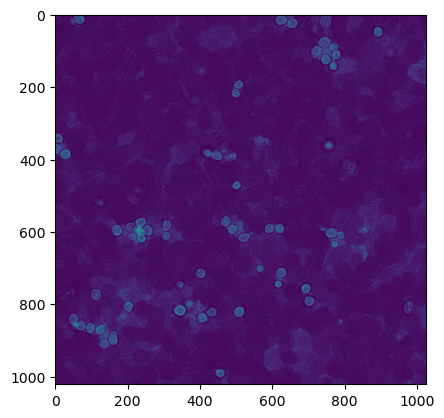

In [13]:
top_hat = morphology.white_tophat(image2, morphology.disk(15))
imshow(top_hat)

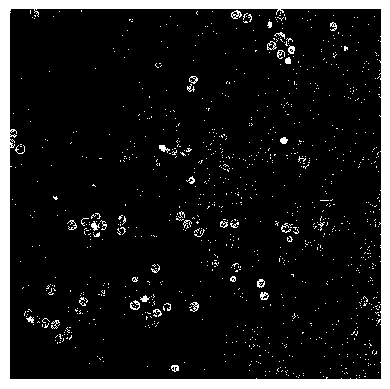

In [14]:
binary_image = image2 > 1450
stackview.imshow(binary_image)

In [15]:
print(image2.shape, image2.dtype)
print('Min:', image2.min(), 'Max:', image2.max(), 'Mean:', image2.mean())

(1022, 1024) uint16
Min: 750 Max: 2402 Mean: 1384.8894305742417


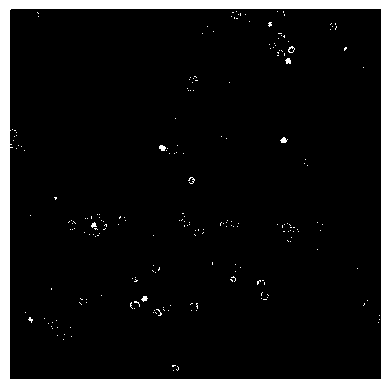

In [16]:
eroded1 = binary_erosion(binary_image, disk(1))
stackview.imshow(eroded1)

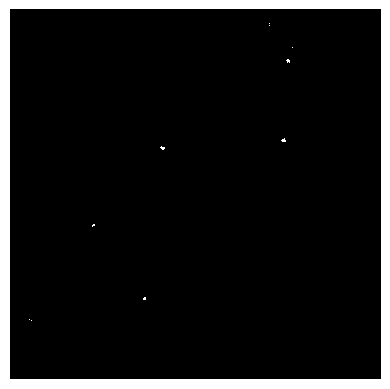

In [17]:
eroded4 = binary_erosion(binary_image, disk(4))
stackview.imshow(eroded4)

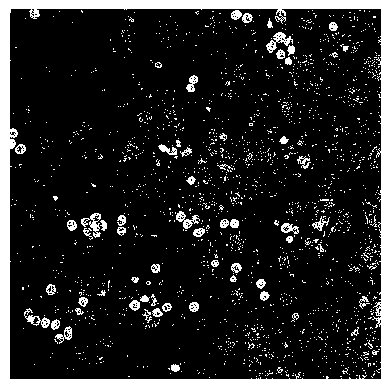

In [18]:
dilated1 = binary_dilation(binary_image, disk(1))
stackview.imshow(dilated1)

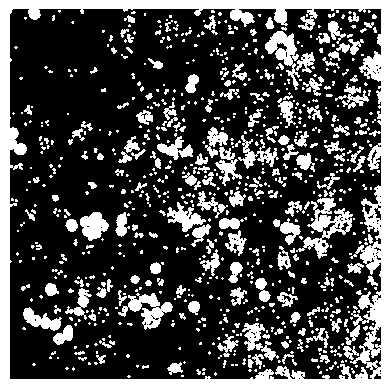

In [19]:
dilated4 = binary_dilation(binary_image, disk(4))
stackview.imshow(dilated4)

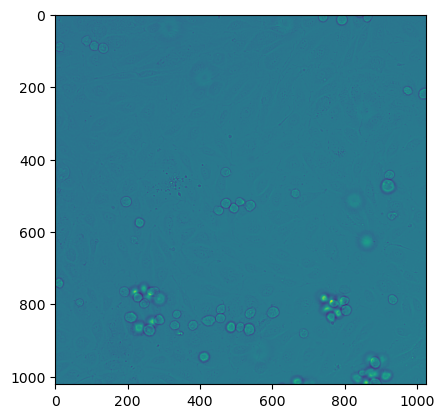

In [26]:
image3 = imread("Training_data/230313_Stardist_CC_round_source_JP/17.tif")
imshow(image3)

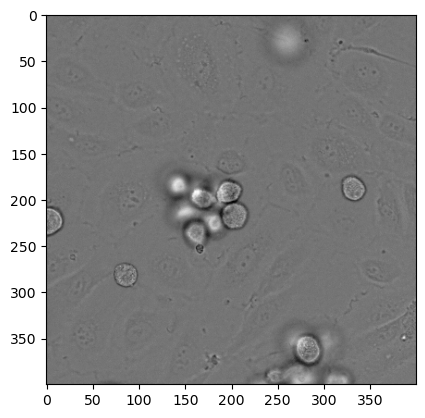

In [27]:
cropped_image = image3[600:1000, 600:1000]

imshow(cropped_image, cmap='Greys_r')

[[0.02159476 0.02154061 0.02149477 ... 0.02152791 0.02153633 0.02154418]
 [0.02156639 0.02152362 0.02148808 ... 0.02153082 0.02154197 0.02155239]
 [0.02153675 0.02150602 0.02148106 ... 0.02153155 0.02154452 0.0215567 ]
 ...
 [0.02143383 0.02145718 0.02147696 ... 0.02164058 0.0216192  0.02159759]
 [0.02139883 0.02142731 0.02145231 ... 0.0216038  0.02157905 0.02155358]
 [0.0213696  0.02140255 0.02143198 ... 0.0215677  0.02153871 0.02150817]]
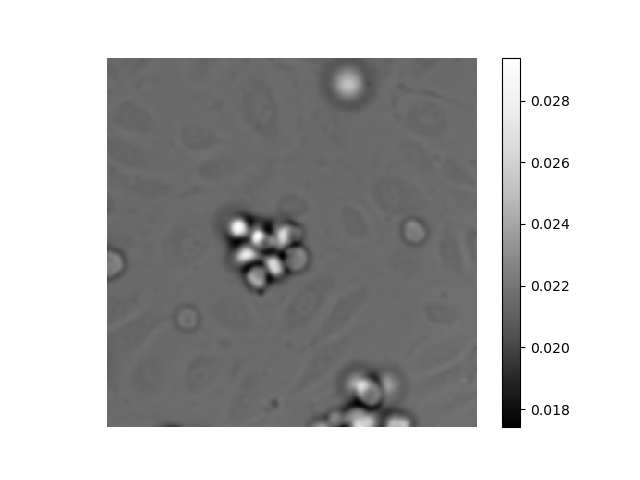
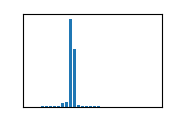

In [28]:
blurred_image = nsbatwm.gaussian_blur(cropped_image, sigma=3)

blurred_image

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
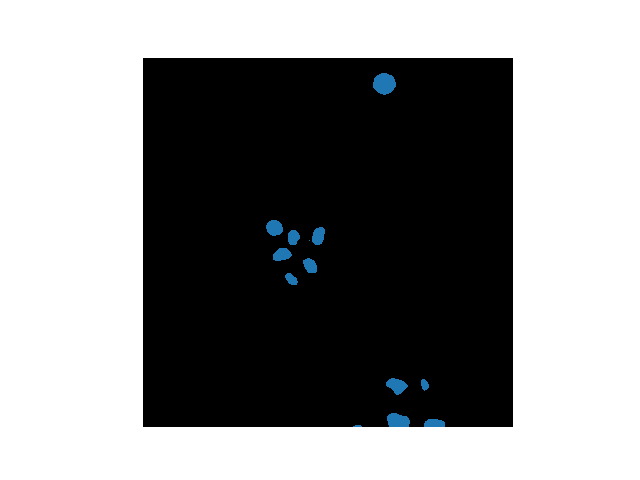

In [29]:
binary_image = nsbatwm.threshold_otsu(blurred_image)

binary_image

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
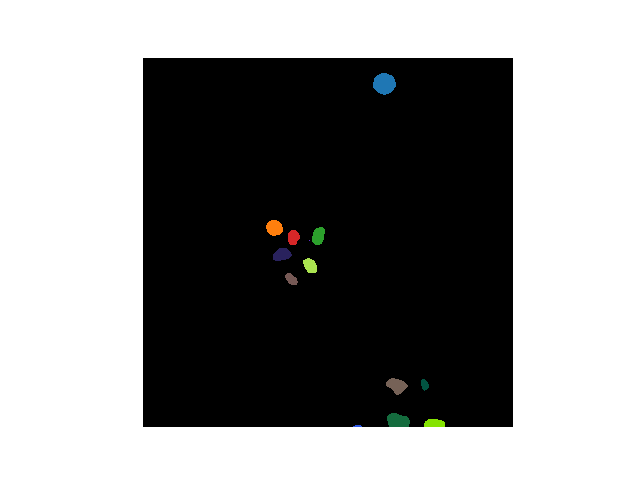

In [30]:
label_image = nsbatwm.connected_component_labeling(binary_image)

label_image

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
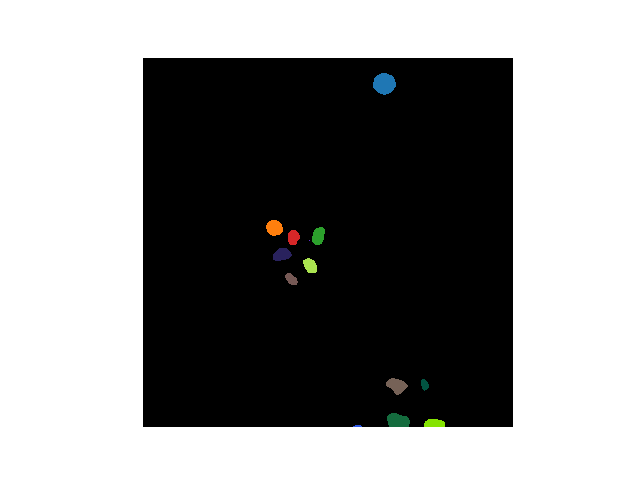

In [31]:
labels_image_2 = nsbatwm.gauss_otsu_labeling(cropped_image, 
                                             outline_sigma=3)

labels_image_2

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
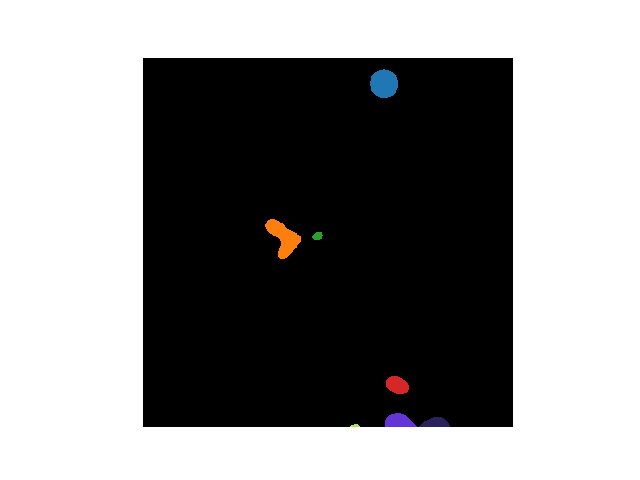

In [32]:
labels_image_3 = nsbatwm.gauss_otsu_labeling(cropped_image, 
                                             outline_sigma=10)

labels_image_3

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
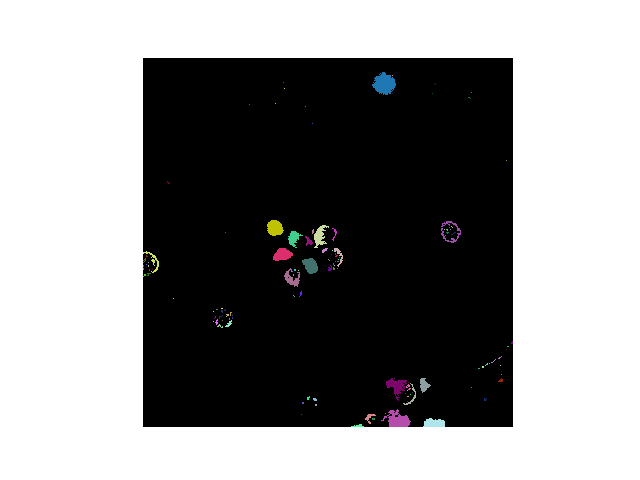

In [33]:
labels_image_4 = nsbatwm.gauss_otsu_labeling(cropped_image, 
                                             outline_sigma=0)

labels_image_4

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
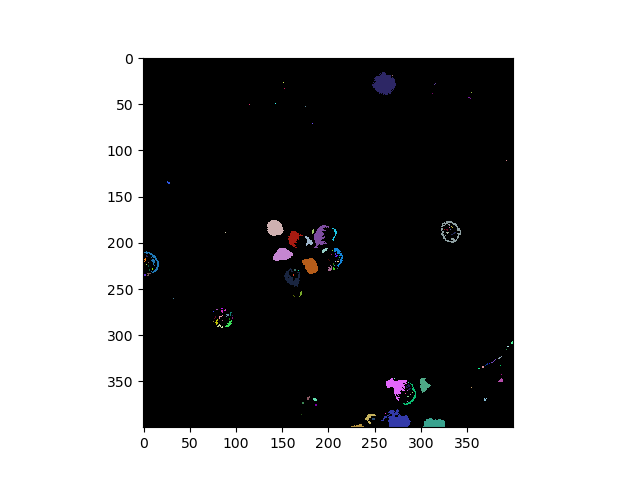

In [34]:
import pyclesperanto_prototype as cle

labels_image_5 = cle.gauss_otsu_labeling(cropped_image, 
                                             outline_sigma=0)

labels_image_5

In [37]:
viewer = napari.Viewer()

Assistant skips harvesting pyclesperanto as it's not installed.


In [4]:
image_sequence = io.volread("Training_data/230313_Stardist_CC_round_source_JP/07.tif")
print(f'shape: {image_sequence.shape}')

shape: (1022, 1024)
